Le **`TfidfVectorizer`** est un outil de la bibliothèque `scikit-learn` qui transforme du texte brut en une représentation numérique appelée **matrice TF-IDF** (Term Frequency - Inverse Document Frequency). Cette méthode est couramment utilisée pour convertir des données textuelles en vecteurs utilisables dans des algorithmes de machine learning.

### Détails sur `TfidfVectorizer` :

1. **Term Frequency (TF)** :
   - **TF** mesure la fréquence d'apparition d'un mot dans un document par rapport au nombre total de mots dans ce document.
   - La formule est :
       TF(t,d)= Nombre total de termes dans le document d / Nombre de fois que le terme t apparat dans le document d
 
   - Cela donne un score de fréquence pour chaque mot dans chaque document.

2. **Inverse Document Frequency (IDF)** :
   - **IDF** mesure l'importance d'un mot en fonction de sa rareté dans l'ensemble des documents.
   - Si un mot est très fréquent dans plusieurs documents, son importance est réduite, car il n'apporte pas d'information discriminante.
   - La formule est :
     \[
     \text{IDF}(t, D) = \log\left(\frac{\text{Nombre total de documents } |D|}{\text{Nombre de documents contenant le terme } t} + 1\right)
     \]
   - Cela donne un poids plus faible aux mots communs (comme "le", "la", etc.) et plus élevé aux mots rares.

3. **TF-IDF Score** :
   - Le score TF-IDF pour chaque terme est le produit de TF et IDF :
       IDF(t,D)=log( Nombre de documents contenant le terme t / Nombre total de documents ∣D∣ +1)
     
   - Le résultat est une matrice où chaque document est représenté par un vecteur de scores TF-IDF pour chaque mot.

### Avantages du TF-IDF :
- **Réduit l'impact des mots fréquents** : Les mots très fréquents mais peu significatifs (comme "de", "le", "et") obtiennent des scores faibles.
- **Mots rares et importants** : Les mots plus rares, mais discriminants (qui apparaissent dans peu de documents), ont des scores plus élevés, ce qui permet d'améliorer la pertinence dans les tâches de classification ou de recherche.

### Comment utiliser `TfidfVectorizer` :

Voici quelques paramètres importants de `TfidfVectorizer` et comment l'utiliser :

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer un exemple de corpus
corpus = [
    "I love programming in Python.",
    "Python is a great programming language.",
    "I love data science and machine learning."
]

# Initialiser le TfidfVectorizer
vectorizer = TfidfVectorizer(
    stop_words='english',   # Exclut les mots fréquents et peu informatifs (comme "and", "the")
    max_features=1000,      # Limite à 1000 les termes les plus fréquents
    ngram_range=(1, 2)      # Prend en compte les unigrammes et bigrammes (mots seuls et paires de mots)
)

# Transformer le texte en vecteurs TF-IDF
X_tfidf = vectorizer.fit_transform(corpus)

# Afficher les noms des termes et la matrice TF-IDF
print("Features (termes):", vectorizer.get_feature_names_out())
print("Matrice TF-IDF:")
print(X_tfidf.toarray())
```

### Paramètres utiles de `TfidfVectorizer` :
- **`stop_words`** : Permet de supprimer des mots courants (comme "the", "is", "and") qui ne sont pas significatifs pour la classification.
- **`max_features`** : Définit le nombre maximal de termes à conserver, en prenant les termes les plus fréquents.
- **`ngram_range`** : Définit la taille des n-grammes à prendre en compte. Par exemple, `(1, 1)` signifie seulement des mots individuels (unigrammes), et `(1, 2)` signifie des unigrammes et des bigrammes (paires de mots).
- **`min_df`** : Définit le seuil minimal de documents dans lesquels un terme doit apparaître pour être pris en compte.
- **`max_df`** : Définit le seuil maximal pour ignorer les termes trop fréquents dans tous les documents (par exemple, ignorer les termes présents dans plus de 90 % des documents).

### Exemple de sortie :

Si l'on prend le corpus suivant :
```python
corpus = ["I love programming in Python.",
          "Python is a great programming language.",
          "I love data science and machine learning."]
```

L'utilisation de `TfidfVectorizer` sur ce corpus peut générer une matrice TF-IDF où chaque ligne représente un document, et chaque colonne représente un mot (ou n-gramme) avec ses valeurs de TF-IDF associées.

### Conclusion :
`TfidfVectorizer` est un outil efficace pour transformer du texte en vecteurs numériques, tout en réduisant l'importance des mots fréquents peu discriminants et en donnant plus de poids aux termes rares mais importants pour la tâche de classification ou d'extraction d'informations.

IDF(t,D)=log( 
Nombre de documents contenant le terme t
Nombre total de documents ∣D∣
​
 +1)

Prenons un exemple concret de corpus avec quelques phrases, puis calculons manuellement les scores TF-IDF pour illustrer le processus.

### Exemple de corpus :
Supposons que nous avons trois documents dans notre corpus :

```text
1. "Le chat mange une souris."
2. "Le chien mange une pomme."
3. "Le chat et le chien jouent ensemble."
```

#### Étape 1 : Calculer la fréquence des termes (TF)
La **TF (Term Frequency)** est le nombre de fois qu'un mot apparaît dans un document, divisé par le nombre total de mots dans ce document.

| Terme   | Document 1           | Document 2           | Document 3                |
|---------|----------------------|----------------------|---------------------------|
| le      | 1/5 = 0.2            | 1/5 = 0.2            | 1/7 ≈ 0.14                |
| chat    | 1/5 = 0.2            | 0                    | 1/7 ≈ 0.14                |
| mange   | 1/5 = 0.2            | 1/5 = 0.2            | 0                         |
| une     | 1/5 = 0.2            | 1/5 = 0.2            | 0                         |
| souris  | 1/5 = 0.2            | 0                    | 0                         |
| chien   | 0                    | 1/5 = 0.2            | 1/7 ≈ 0.14                |
| pomme   | 0                    | 1/5 = 0.2            | 0                         |
| et      | 0                    | 0                    | 1/7 ≈ 0.14                |
| jouent  | 0                    | 0                    | 1/7 ≈ 0.14                |
| ensemble| 0                    | 0                    | 1/7 ≈ 0.14                |

#### Étape 2 : Calculer l'IDF (Inverse Document Frequency)
L'**IDF** évalue l'importance d'un mot en fonction de sa rareté dans l'ensemble des documents. Moins un mot apparaît dans de nombreux documents, plus il sera important.

- La formule pour l'IDF est :
    IDF(t,D)=log( nt/N +1)


Où :
- \(N\) est le nombre total de documents.
- \(n_t\) est le nombre de documents contenant le terme \(t\).

Calculons l'IDF pour chaque terme :

| Terme    | Nombre de documents contenant le terme \(n_t\) | IDF (avec \(N=3\))                         |
|----------|-----------------------------------------------|--------------------------------------------|
| le       | 3 documents                                    | \(\log\left(\frac{3}{3} + 1\right) = 0\)   |
| chat     | 2 documents                                    | \(\log\left(\frac{3}{2} + 1\right) ≈ 0.41\)|
| mange    | 2 documents                                    | \(\log\left(\frac{3}{2} + 1\right) ≈ 0.41\)|
| une      | 2 documents                                    | \(\log\left(\frac{3}{2} + 1\right) ≈ 0.41\)|
| souris   | 1 document                                     | \(\log\left(\frac{3}{1} + 1\right) ≈ 0.69\)|
| chien    | 2 documents                                    | \(\log\left(\frac{3}{2} + 1\right) ≈ 0.41\)|
| pomme    | 1 document                                     | \(\log\left(\frac{3}{1} + 1\right) ≈ 0.69\)|
| et       | 1 document                                     | \(\log\left(\frac{3}{1} + 1\right) ≈ 0.69\)|
| jouent   | 1 document                                     | \(\log\left(\frac{3}{1} + 1\right) ≈ 0.69\)|
| ensemble | 1 document                                     | \(\log\left(\frac{3}{1} + 1\right) ≈ 0.69\)|

#### Étape 3 : Calculer les scores TF-IDF
Pour chaque terme, multiplions la **TF** par l'**IDF**.

Exemple pour le terme **"chat"** dans le document 1 :
- **TF (chat, doc1)** = 0.2
- **IDF (chat)** ≈ 0.41

    - TF-IDF(chat, doc1)=0.2×0.41≈0.082


Faisons le calcul pour chaque terme :

| Terme    | Document 1           | Document 2           | Document 3                |
|----------|----------------------|----------------------|---------------------------|
| le       | 0                    | 0                    | 0                         |
| chat     | 0.082                | 0                    | 0.058                     |
| mange    | 0.082                | 0.082                | 0                         |
| une      | 0.082                | 0.082                | 0                         |
| souris   | 0.138                | 0                    | 0                         |
| chien    | 0                    | 0.082                | 0.058                     |
| pomme    | 0                    | 0.138                | 0                         |
| et       | 0                    | 0                    | 0.098                     |
| jouent   | 0                    | 0                    | 0.098                     |
| ensemble | 0                    | 0                    | 0.098                     |

### Conclusion :
Les valeurs **TF-IDF** obtenues montrent à quel point chaque terme est important dans un document en particulier. Par exemple, dans le document 1, le mot **"souris"** a une valeur TF-IDF plus élevée que **"chat"**, car il n'apparaît que dans ce document et donc a un IDF plus élevé.

Le **`TfidfVectorizer`** fait ces calculs automatiquement et permet d'obtenir une matrice TF-IDF pour une analyse plus approfondie.

In [1]:
### Import des librairies
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [2]:
### Lire le corpus
corpus = pd.read_csv('datasets/classification/Youtube-Spam-Dataset.csv')

In [3]:
corpus

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1
...,...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0


- 0 : non spam
- 1 : spam

In [4]:
# Extraire le content
content = corpus['CONTENT']

In [29]:
content[0]

'Huh, anyway check out this you[tube] channel: kobyoshi02'

In [6]:
# Conversion du content en vecteur numérique
vectorizer = TfidfVectorizer(
    stop_words='english',   # Exclut les mots fréquents et peu informatifs (comme "and", "the")
)

In [7]:
# Transformer le texte en vecteurs TF-IDF
X_tfidf = vectorizer.fit_transform(content)

In [8]:
print(X_tfidf)

  (0, 2232)	0.5882545194693168
  (0, 906)	0.25136004712214494
  (0, 3844)	0.5199041842695195
  (0, 922)	0.18052433165792894
  (0, 1977)	0.5365494869004906
  (1, 3600)	0.1615250713032538
  (1, 1008)	0.2191571400249832
  (1, 2313)	0.1587212657894938
  (1, 2289)	0.28890275999870085
  (1, 3366)	0.35787697875792346
  (1, 4073)	0.337703313012582
  (1, 2592)	0.3721904223921933
  (1, 2593)	0.39236408813753476
  (1, 3952)	0.337703313012582
  (1, 2680)	0.2133820409144466
  (1, 1830)	0.19577240006612226
  (1, 1912)	0.20522790201939378
  (1, 906)	0.16765643512991726
  (1, 922)	0.12040921477577482
  (2, 997)	0.23710314736860486
  (2, 2635)	0.5793680944794691
  (2, 3281)	0.44773158254114803
  (2, 3723)	0.5793680944794691
  (2, 2179)	0.26829787494789914
  (3, 1415)	0.42798470252107945
  :	:
  (1947, 2680)	0.5025515213504276
  (1947, 922)	0.2835844751079011
  (1948, 3252)	0.5617776241774657
  (1948, 4009)	0.8272882816609469
  (1949, 3482)	0.7969142088945247
  (1949, 679)	0.6040924959491005
  (1950, 33

In [23]:
print(X_tfidf.shape)

(1956, 4229)


In [9]:
y = corpus['CLASS']

In [10]:
y.shape

(1956,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf,y, test_size=0.2, random_state=42)

### Entrainement avec la regression logistique

In [12]:
# Initialisation du modèle
model_logistic = LogisticRegression()

In [13]:
# Entrainement du modèle
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_log_pred = model_logistic.predict(X_test)

In [15]:
y_log_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,

In [16]:
accuracy_log = accuracy_score(y_test, y_log_pred)
accuracy_log

0.9387755102040817

In [18]:
matrice_log = confusion_matrix(y_test, y_log_pred)
matrice_log

array([[172,   4],
       [ 20, 196]], dtype=int64)

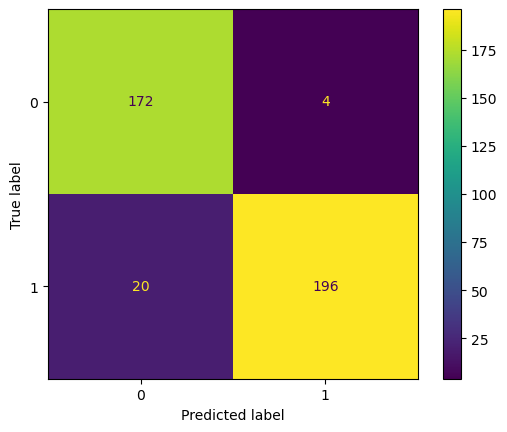

In [19]:
cm = ConfusionMatrixDisplay(confusion_matrix=matrice_log)
cm.plot()

In [30]:
### Définir un texte
text = ["Huh, anyway check out this you[tube] channel: kobyoshi02 ?"]

In [31]:
# Transformer le texte en vecteurs TF-IDF
X_test = vectorizer.transform(text)

In [32]:
y_pred = model_logistic.predict(X_test)
y_pred

array([1], dtype=int64)